In [1]:
import pandas as pd
import numpy as np

#Loading the data set 
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#Finding correlation between various featured and quality.It shows that alcohol and volatile acidity are highly correlated with quality of the wine.
correlation=df.corr()['quality'][:].drop(['quality'])
print(correlation)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [3]:
#Make binary classification of the variable 'quality'
#If quality is greater than or equal to 7, then it is good(1), else it is bad(0)
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

0    1382
1     217
Name: goodquality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='goodquality', ylabel='count'>

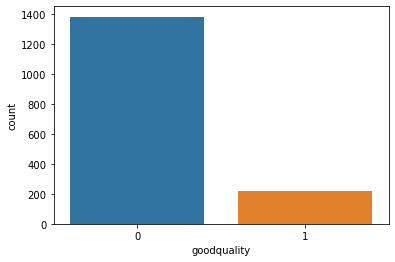

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#Count plot to view the number of Good and bad quality wine.

print(df['goodquality'].value_counts())
sns.countplot(df['goodquality'])

In [5]:
from sklearn.model_selection import train_test_split
#Split the data set into training and testing set with 30% of data as test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [6]:
from sklearn.preprocessing import StandardScaler
#Normalize both the train and test sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier
#Create a Random forest classifier with 200 trees
rfc = RandomForestClassifier(n_estimators=200)
#Train the model with the random forst classifier
rfc.fit(X_train, y_train)
#Test the model using the test data set
pred_rfc = rfc.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
#Classification report shows the accuracy of the model by comparing the predicted values with the test values
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       425
           1       0.68      0.47      0.56        55

    accuracy                           0.91       480
   macro avg       0.81      0.72      0.76       480
weighted avg       0.91      0.91      0.91       480



In [ ]:
#The report shows that the model that we created has predicted the test values with 91% accuracy